# IMAGE PREPROCESS

In [1]:
# IMPORTING REQUIRED MODULES FOR PREPROCESSING
import numpy as np
import pandas as pd
import cv2
import os

In [2]:
# Importing the file from the local system

import glob
import matplotlib.pyplot as plt

# Set the path to the directory containing the images
path = 'ML_8k'

# Use the glob function to retrieve a list of image files
images = glob.glob(path + '/*.jpg')
len(images)

8091

In [3]:
# Displaying 5 image names 
images[:5]

['ML_8k\\1000268201_693b08cb0e.jpg',
 'ML_8k\\1001773457_577c3a7d70.jpg',
 'ML_8k\\1002674143_1b742ab4b8.jpg',
 'ML_8k\\1003163366_44323f5815.jpg',
 'ML_8k\\1007129816_e794419615.jpg']

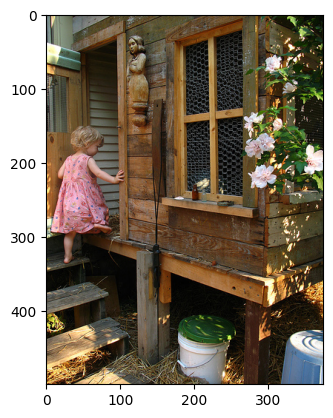

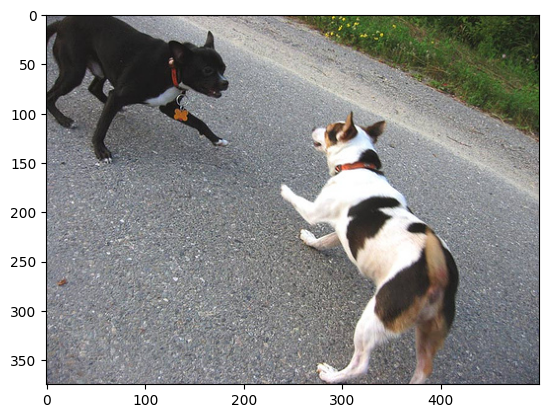

In [4]:
# Displaying the 2 images From the Directiory

import matplotlib.pyplot as plt

for i in range(2):
    plt.figure()
    img = cv2.imread(images[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)

# Importing ResNet
#### Resnet, essentially produces 1000 output feature extraction. We want the second last layer which has the activation of average pooling which has 2048 feature extracted output.  

In [5]:
from keras.applications import ResNet50

incept_model = ResNet50(include_top=True)

In [6]:
from keras.models import Model
last = incept_model.layers[-2].output
model_resnet50 = Model(inputs = incept_model.input,outputs = last)

# Below command will give the model summary 
#modele.summary()

# EXTRACTING IMAGE FEATURES
### Here, we are making a dictionary for all the image ID as key, and predictions of the resnet feature extraction as value.

In [7]:
# Splitting the image name from the path and accessing only the image name 

images[0].split('\\')[-1]

'1000268201_693b08cb0e.jpg'

In [8]:
images_features = {}
count = 0

# Images is the variable where we have imported all the images 
for i in images:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    
    img = img.reshape(1,224,224,3)
    
    # modele is the resnet 50 which we have define above
    pred = model_resnet50.predict(img).reshape(2048,)
        
    img_name = i.split('\\')[-1]
    
    images_features[img_name] = pred
    
    count += 1
    
    # This loop is for extracting the image features and displaying the count 50 after every successful extraction of features
    if count > 50:
        break
        
    elif count % 50 == 0:
        print(count)
    

1/1 [==============================] - 0s 113ms/step
50
1/1 [==============================] - 0s 118ms/step


In [9]:
# Length of the images_features

len(images_features)

51

In [10]:
# Printing images_features
print(images_features)

{'1000268201_693b08cb0e.jpg': array([0.1672582 , 0.46361908, 0.00352357, ..., 0.11895256, 0.4263411 ,
       1.3225985 ], dtype=float32), '1001773457_577c3a7d70.jpg': array([1.440985  , 1.0435452 , 0.23661092, ..., 0.39719492, 0.04307791,
       0.30509183], dtype=float32), '1002674143_1b742ab4b8.jpg': array([1.5449812e+00, 9.8682970e-01, 1.1312475e-04, ..., 0.0000000e+00,
       1.1347520e+00, 4.7488433e-01], dtype=float32), '1003163366_44323f5815.jpg': array([0.9030595 , 0.11390916, 0.74887127, ..., 0.33106753, 0.        ,
       0.        ], dtype=float32), '1007129816_e794419615.jpg': array([0.33239838, 2.2867289 , 0.        , ..., 0.20395704, 0.        ,
       0.2545191 ], dtype=float32), '1007320043_627395c3d8.jpg': array([1.6907165 , 0.71951556, 0.09514093, ..., 0.        , 0.24099389,
       0.00307021], dtype=float32), '1009434119_febe49276a.jpg': array([0.40478322, 0.3364487 , 0.43302447, ..., 0.36723483, 0.09850305,
       0.16856405], dtype=float32), '1012212859_01547e3f17

# Text Preprocess  (Creating the dictionary of the image name as key and captions as a value)

In [11]:
# giving the path of the caption text file 
caption_path = 'Captions_8k.txt'

In [12]:
# opening the file and reading it 
captions = open(caption_path, 'rb').read().decode('utf-8').split('\n')

In [13]:
len(captions)

40461

In [14]:
captions[0].split('\t')[0][:-2]

'1000268201_693b08cb0e.jpg'

In [15]:
captions_dict = {}
for i in captions:
    try:
        
        # Extract the image name from the caption file 
        img_name = i.split('\t')[0][:-2] 
        caption = i.split('\t')[1]
        
         # If the image name is images_features, add the caption to its list
        if img_name in images_features:
            
            if img_name not in captions_dict:
                
                # If image name is not in caption dictonary we will set that image name as key 
                # and caption as a list 
                captions_dict[img_name] = [caption]
                
                # if image name is already available we will append the caption only
            else:
                captions_dict[img_name].append(caption)
            
    except IndexError:
        pass
    

In [16]:
len(captions_dict)

51

In [17]:
#print(captions_dict)

In [18]:
captions_dict['1000268201_693b08cb0e.jpg']

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .']

# Visualize Images with captions 

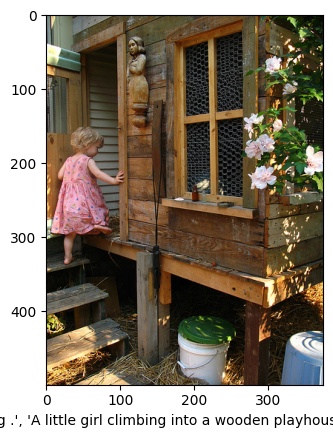

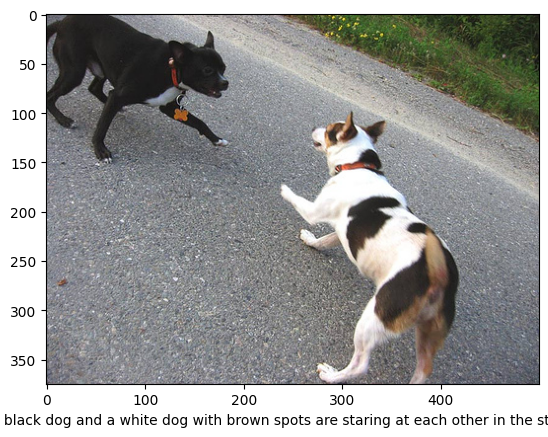

In [19]:
# we are showing the image with its caption as a label in

import matplotlib.pyplot as plt

for i in range(2):
    plt.figure()
    img_name = images[i]
    
    
    img = cv2.imread(img_name)
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xlabel(captions_dict[img_name.split('\\')[-1]])
    plt.imshow(img)

# Functions for Text and Image Processing

In [20]:
def preprocessed(txt):
    modified = txt.lower()
    modified = '[start] ' + modified + ' [end]'
    return modified

In [21]:
for key,value in captions_dict.items():
    for one_value in value:
        captions_dict[key][value.index(one_value)] = preprocessed(one_value)

In [22]:
captions_dict['1000268201_693b08cb0e.jpg']

['[start] a child in a pink dress is climbing up a set of stairs in an entry way . [end]',
 '[start] a girl going into a wooden building . [end]',
 '[start] a little girl climbing into a wooden playhouse . [end]',
 '[start] a little girl climbing the stairs to her playhouse . [end]',
 '[start] a little girl in a pink dress going into a wooden cabin . [end]']

# CREATING VOCABULARY

In [23]:
# intitially we are creating count word as a blank dictionary and then assigning the unique value to each words

count_words = {}
count=1
for key,value in captions_dict.items():
       
        #  Here value is the list of 5 different captions 
        
    for i in value:
        for word in i.split():
            if word not in count_words:
                # Herer we will check that the word is in the count words
                
                count_words[word]=count
                count += 1
                
#                 count_words[word] = 0

#             else:
#                 count_words[word] += 1

In [24]:
len(count_words)

525

In [25]:
#print(count_words)

In [26]:
# Captions are converted into the integers from the above count words snippet

for key, value in captions_dict.items():
    for v in value:
        # Below list will have encoded captions
        encoded = []
        for word in v.split():  
                # Here we are using the count_words dict that we have created in the above snippet
                encoded.append(count_words[word])

        captions_dict[key][value.index(v)] = encoded

# CAPTION GENERATOR FUNCTION

In [27]:
from tensorflow.keras.utils import to_categorical
from keras_preprocessing.sequence import pad_sequences

In [28]:
# Here we are taking the MAX_LEN as a size of the caption
# MAX_LEN is given form the maximum length of the caption present in the dictionary 

MAX_LEN = 0
for image_key , image_value in captions_dict.items():
    for one_image_value in image_value:
        if len(one_image_value) > MAX_LEN:
            MAX_LEN = len(one_image_value)
            print(one_image_value)

[1, 2, 3, 4, 2, 5, 6, 7, 8, 9, 2, 10, 11, 12, 4, 13, 14, 15, 16, 17]
[1, 2, 29, 30, 31, 2, 42, 30, 37, 43, 44, 33, 45, 46, 38, 39, 4, 25, 47, 16, 17]
[1, 2, 23, 18, 56, 4, 57, 58, 4, 59, 11, 2, 60, 61, 37, 27, 62, 4, 2, 63, 16, 17]
[1, 2, 66, 18, 4, 25, 67, 68, 37, 69, 4, 59, 11, 2, 42, 70, 37, 2, 61, 40, 71, 16, 17]
[1, 2, 250, 31, 13, 251, 136, 252, 253, 82, 25, 254, 136, 64, 88, 26, 2, 255, 37, 2, 131, 82, 256, 16, 17]
[1, 2, 77, 7, 93, 25, 247, 11, 2, 237, 9, 26, 81, 226, 4, 59, 11, 400, 340, 80, 188, 77, 192, 40, 16, 17]


In [29]:
MAX_LEN

26

In [30]:
#Batch_size = 5000
VOCAB_SIZE = len(count_words)

def caption_generator(photo,caption):
    #n_samples = 0
    
    X = []
    y_in = []
    y_out = []
    
    # Here we are itereating in the captions dictionary i.e appending the images 
    
    for image_key , image_value in captions_dict.items():

        # This loop is for the five different captions
        for one_image_value in image_value:
            
            # This loop if for one single caption
            for i in range(1, len(one_image_value)):
                
                # Appending image features to X variable in sequence 
                X.append(photo[image_key])
                
                # in_seq meaning we are splitting it from 0 upto  1 
                # Then 0 upto 2 and so on 
                
                in_seq= [one_image_value[:i]]
                
                # Out_seq is the new word 
                out_seq = one_image_value[i]
                
                # To convert the varibale length to max length 
                
                ## e.g 
                ## in_seq = [1,2,56] ------>  pad_sequence will going to do is convert the in_seq to 
                ## [1,2,56,0,0,0,0,0........40(lengths)] (Consant Legth for every lines )
                in_seq = pad_sequences(in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0]
               
                ## Out_seq it will be of only 1 length 
                ## will convert that to vocab_size i.e 8689 (in our case)
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE+1)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)
            
    return  X,y_in, y_out

In [31]:
# giving the input to the generator funtion
X, y_in, y_out = caption_generator(images_features, captions_dict)

In [32]:
# Checking the length of all the lists 

len(X), len(y_in), len(y_out)

(3356, 3356, 3356)

In [33]:
# converting all the lengths to numoy arrays 
# We can process it faster 
X = np.array(X)
y_in = np.array(y_in, dtype='float64')
y_out = np.array(y_out, dtype='float64')

In [34]:
# checking the shape of the lists 
X.shape, y_in.shape, y_out.shape

((3356, 2048), (3356, 26), (3356, 526))

In [35]:
#Accessing the element from the list 
X[1510]

array([1.8855379 , 0.58140707, 0.6403073 , ..., 0.16447997, 0.02742807,
       1.096362  ], dtype=float32)

# Model Creation

In [36]:
from tensorflow import keras
from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merging import add
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model

In [91]:
embedding_size = 128
max_len = MAX_LEN

vocab_size = len(count_words)+1

image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
final_model = Model(inputs=[image_model.input, language_model.input], outputs = out)

# model.load_weights("../input/model_weights.h5")
final_model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
final_model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               262272    
                                                                 
 repeat_vector_8 (RepeatVect  (None, 26, 128)          0         
 or)                                                             
                                                                 
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 26, 128)           67328     
                                                                 
 lstm_24 (LSTM)              (None, 26, 256)           394240    
                        

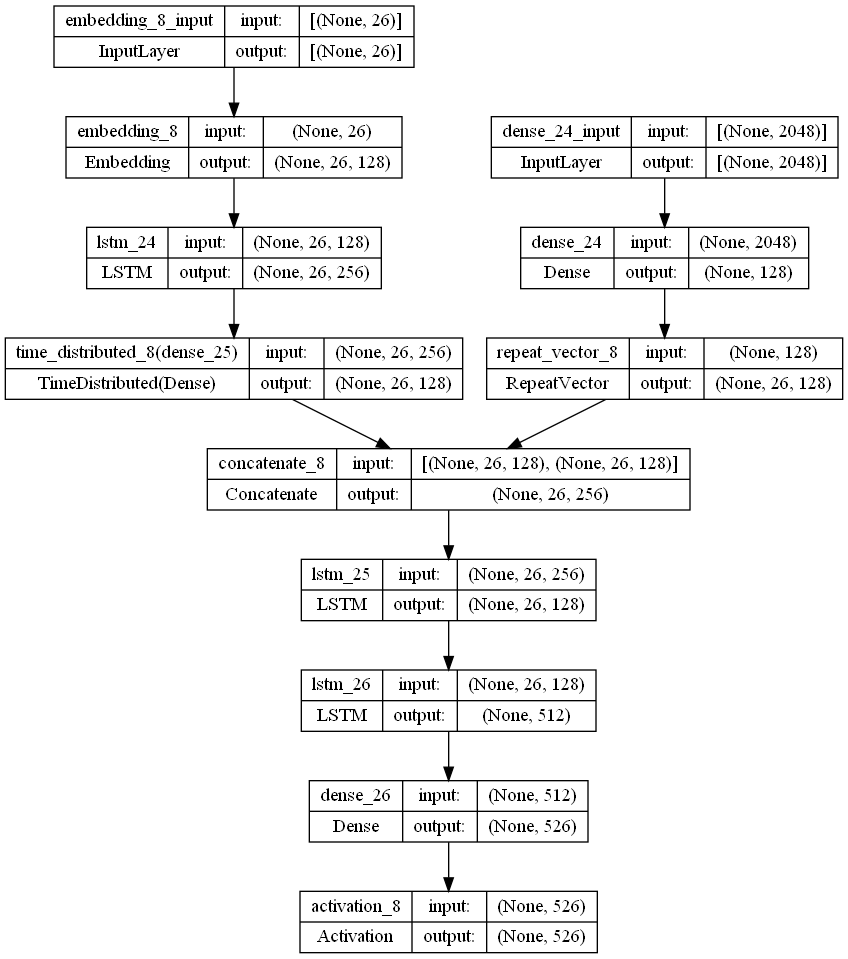

In [92]:
# Show the shape of the model
from keras.utils import plot_model
plot_model(final_model,show_shapes=True)

#### The model is trained for 50 epochs. The accuracy it generates is 73 %. You can train it for more epochs and use Early Callbacks for better precision. 

In [93]:
# final_model.fit([X, y_in], y_out, batch_size=512, epochs=2)

In [52]:
# it is inverse of count words

inverse_dict = {value:key for key, value in count_words.items()}

In [53]:
model.save('final_model.h5')

In [54]:
model.save_weights('mine_model_weights.h5')

In [55]:
np.save('vocab.npy', count_words)

# Predictions

In [74]:
def get_image(x):
    
    # assigning the image path 
    test_img_path = images[x]

    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    test_img = cv2.resize(test_img, (224,224))

    test_img = np.reshape(test_img, (1,224,224,3))
    
    return test_img

In [77]:
test_features=model_resnet50.predict(get_image(10)).reshape(1,2048)

1/1 [==============================] - 0s 121ms/step


In [78]:
test_features

array([[1.2314239 , 0.41572556, 1.2953621 , ..., 1.4492197 , 0.06049347,
        0.21116619]], dtype=float32)

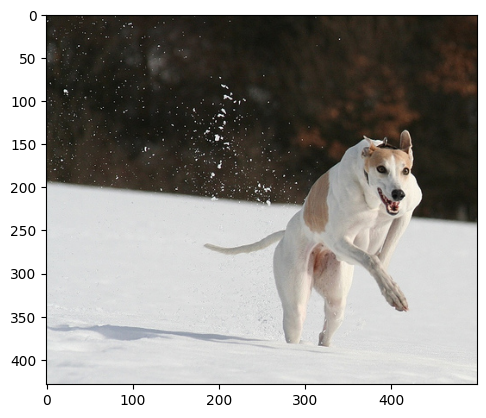

In [79]:
test_img_path = images[10]
test_img = cv2.imread(test_img_path)
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
plt.imshow(test_img)

In [85]:
# text input which is start of sequence 
text_inp = ['[start]']

count = 0
    # Below variable will hold the precdicted variable
caption = ''
    # Check is the count is less than 25
while count < 25:
        count += 1

        encoded = []
        
        # This for loop we will convert the txt input to the integer by using our count_words dictionary
        for i in text_inp:
            encoded.append(count_words[i])

        encoded = [encoded]
            
        # pad_sequences to convert this to max length of the 40 
        encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=MAX_LEN)

        # we are using the
        prediction = np.argmax(model.predict([test_features, encoded]))

        sampled_word = inverse_dict[prediction]

        caption = caption + ' ' + sampled_word
            
        if sampled_word == '[end]':
            break

        text_inp.append(sampled_word)
        

1/1 [==============================] - 0s 42ms/step
